In [36]:
import pandas as pd
from bokeh.io import output_notebook, reset_output
from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler

from scipy.stats import norm

In [74]:
reset_output()
output_notebook()

Loading BokehJS ...

In [51]:
df = pd.read_csv("data.csv")
df.head()

1         2         0         3         4
0 -0.003824 -0.138775 -0.200556  0.463108  0.552381
1  0.129358 -0.426736  0.054166  0.040004  0.239182
2  0.346458 -0.401940 -0.277274  0.310047  0.058352
3  0.257565 -0.350396  0.231516  0.038661  0.678610
4 -0.128383  0.528966 -0.072405 -0.280694 -0.351094

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_alpha" value "alphas", key "fill_color" value "colors", key "line_alpha" value "alphas", key "x" value "xname", key "y" value "yname" [renderer: GlyphRenderer(id=5342, glyph=Rect(id='5339', ...), ...)]


In [58]:
import networkx as nx

from bokeh.io import output_file, show
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool,)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

# Prepare Data
G = nx.read_gml("graph.gml")


#for start_node, end_node, _ in G.edges(data=True):
#    edge_color = SAME_CLUB_COLOR if G.nodes[start_node]["club"] == G.nodes[end_node]["club"] else DIFFERENT_CLUB_COLOR
#    edge_attrs[(start_node, end_node)] = edge_color

#nx.set_edge_attributes(G, edge_attrs, "edge_color")

# Show with Bokeh
plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("club", "@club")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
#graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)
show(plot, handle_notebook=True)

In [29]:

import numpy as np

from bokeh.layouts import gridplot
from bokeh.models import BoxSelectTool, LassoSelectTool
from bokeh.plotting import curdoc, figure

# create three normal population samples with different parameters
x1 = np.random.normal(loc=5.0, size=400) * 100
y1 = np.random.normal(loc=10.0, size=400) * 10

x2 = np.random.normal(loc=5.0, size=800) * 50
y2 = np.random.normal(loc=5.0, size=800) * 10

x3 = np.random.normal(loc=55.0, size=200) * 10
y3 = np.random.normal(loc=4.0, size=200) * 10

x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))

TOOLS="pan,wheel_zoom,box_select,lasso_select,reset"

# create the scatter plot
p = figure(tools=TOOLS, plot_width=600, plot_height=600, min_border=10, min_border_left=50,
           toolbar_location="above", x_axis_location=None, y_axis_location=None,
           title="Linked Histograms")
p.background_fill_color = "#fafafa"
p.select(BoxSelectTool).select_every_mousemove = False
p.select(LassoSelectTool).select_every_mousemove = False

r = p.scatter(x, y, size=3, color="#3A5785", alpha=0.6)

# create the horizontal histogram
hhist, hedges = np.histogram(x, bins=20)
hzeros = np.zeros(len(hedges)-1)
hmax = max(hhist)*1.1

LINE_ARGS = dict(color="#3A5785", line_color=None)

ph = figure(toolbar_location=None, plot_width=p.plot_width, plot_height=200, x_range=p.x_range,
            y_range=(-hmax, hmax), min_border=10, min_border_left=50, y_axis_location="right")
ph.xgrid.grid_line_color = None
ph.yaxis.major_label_orientation = np.pi/4
ph.background_fill_color = "#fafafa"

ph.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hhist, color="white", line_color="#3A5785")
hh1 = ph.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.5, **LINE_ARGS)
hh2 = ph.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.1, **LINE_ARGS)

# create the vertical histogram
vhist, vedges = np.histogram(y, bins=20)
vzeros = np.zeros(len(vedges)-1)
vmax = max(vhist)*1.1

pv = figure(toolbar_location=None, plot_width=200, plot_height=p.plot_height, x_range=(-vmax, vmax),
            y_range=p.y_range, min_border=10, y_axis_location="right")
pv.ygrid.grid_line_color = None
pv.xaxis.major_label_orientation = np.pi/4
pv.background_fill_color = "#fafafa"

pv.quad(left=0, bottom=vedges[:-1], top=vedges[1:], right=vhist, color="white", line_color="#3A5785")
vh1 = pv.quad(left=0, bottom=vedges[:-1], top=vedges[1:], right=vzeros, alpha=0.5, **LINE_ARGS)
vh2 = pv.quad(left=0, bottom=vedges[:-1], top=vedges[1:], right=vzeros, alpha=0.1, **LINE_ARGS)

layout = gridplot([[p, pv], [ph, None]], merge_tools=False)

curdoc().add_root(layout)
curdoc().title = "Selection Histogram"

def update(attr, old, new):
    inds = new
    if len(inds) == 0 or len(inds) == len(x):
        hhist1, hhist2 = hzeros, hzeros
        vhist1, vhist2 = vzeros, vzeros
    else:
        neg_inds = np.ones_like(x, dtype=np.bool)
        neg_inds[inds] = False
        hhist1, _ = np.histogram(x[inds], bins=hedges)
        vhist1, _ = np.histogram(y[inds], bins=vedges)
        hhist2, _ = np.histogram(x[neg_inds], bins=hedges)
        vhist2, _ = np.histogram(y[neg_inds], bins=vedges)

    hh1.data_source.data["top"]   =  hhist1
    hh2.data_source.data["top"]   = -hhist2
    vh1.data_source.data["right"] =  vhist1
    vh2.data_source.data["right"] = -vhist2

r.data_source.selected.on_change('indices', update)

In [42]:
from bokeh.plotting import figure, output_file, show
p = figure(plot_width=400, plot_height=400)

# add a circle renderer with a size, color, and alpha
p.circle(
    [1, 2, 3, 4, 5],
    [6, 7, 2, 4, 5],
    size=20, color="navy", alpha=0.5)

# show the results
show(p)

KeyError: "None of [Float64Index([-0.0038239690532116595,    0.12935792500070933,\n                 0.34645780327598263,     0.2575649106175537,\n                -0.12838295852785273,   -0.06613151329493115,\n                -0.11466794964875393,    0.16041012949174865,\n                 -0.4105259899825877,    -0.1209918464126137,\n              ...\n                -0.09842327434197268,     0.2653598516861799,\n                 0.08166115201054316,    0.17341238272129933,\n                -0.16031315189005274,   0.062415777020590674,\n                -0.08461797118194109,    0.07225973645244539,\n                 -0.0819623185790205,    0.20272643950983996],\n             dtype='float64', length=1000)] are in the [columns]"

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
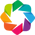

In [47]:
import numpy as np
import holoviews as hv
from holoviews import opts, Cycle
hv.extension('bokeh')

In [56]:
hv.Distribution(norm.cdf(df["4"]))

:Distribution   [Value]   (Density)

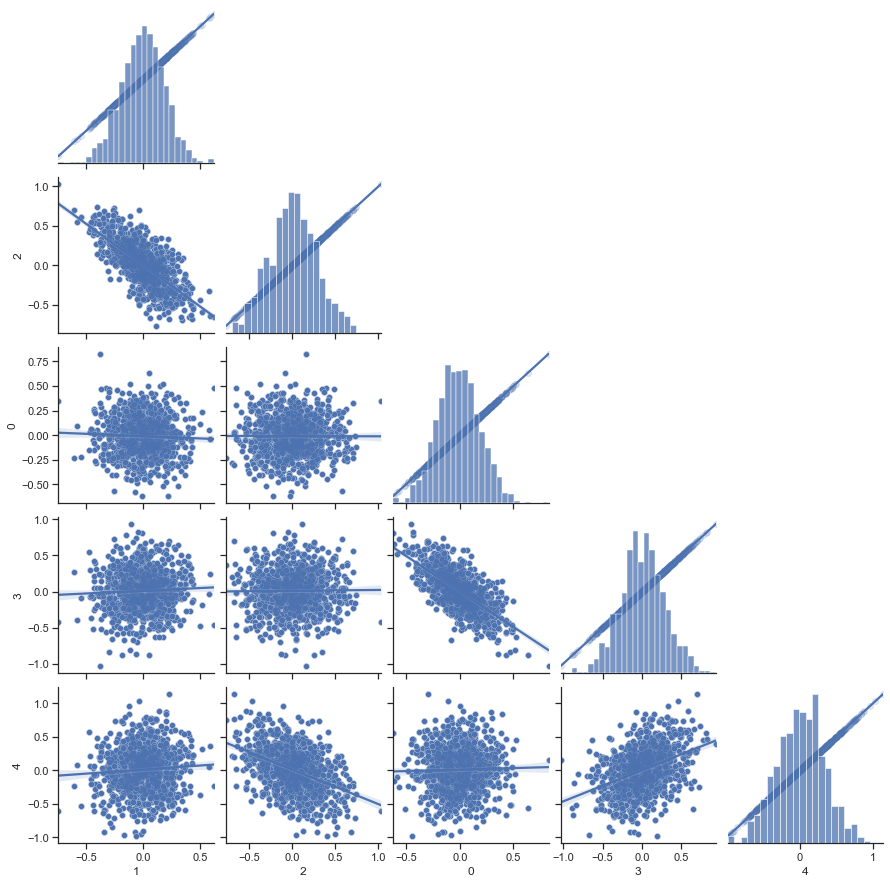

In [71]:
import seaborn as sns
sns.set_theme(style="ticks")

g = sns.pairplot(df, corner=True)
g.map(sns.regplot, scatter_kws={'alpha':0.15})

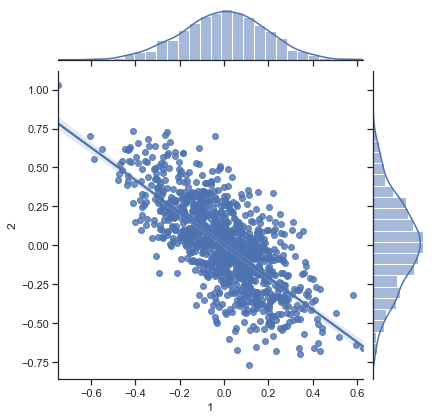

In [66]:
sns.jointplot(x=df["1"], y=df["2"], data=df, kind="reg");

In [156]:
from bokeh.io import output_file, show
from bokeh.layouts import gridplot
from bokeh.plotting import figure

# create three plots
plots = []
node_max = df.columns[len(df.columns) - 1]
node_min = df.columns[0]

output_file("nice_plot.html")

for row_index, row in enumerate(df.columns):
    for column_index, column in enumerate(df.columns):
        
        if column_index > row_index:
            plots.append(None)
            continue

        x_axis_label = f"Node {row}" if row_index == 0 else ""
        y_axis_label = f"Node {column}" if column == node_max else ""
        # create figure with data
        
        s1 = figure(title=f"{column},{row}",x_axis_label=x_axis_label, y_axis_label=y_axis_label)
        
        edge = (row, column) in G.edges or (column, row) in G.edges
        
        s1.background_fill_color = "green" if edge else "red"
        s1.background_fill_alpha = 0.05
        
        if column != row:

            x = df[row]
            y = df[column]
            
            edge = (row, column) in G.edges or (column, row) in G.edges
            s1.circle(x, y, size=1, alpha=0.8, color="green" if edge else "red")
            
            s1.circle(x, y, size=1, alpha=0.8, color="#53777a")

            # calculate slope + intercept
            par = np.polyfit(x, y, 1, full=True)
            slope=par[0][0]
            intercept=par[0][1]
            y_predicted = [slope*i + intercept  for i in x]
            s1.line(x,y_predicted,color='red',legend_label='y='+str(round(slope,2))+'x+'+str(round(intercept,2)))
        else:
            node = row 
            hist, edges = np.histogram(df[node], density=True, bins=50)
            
            s1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
                   fill_color="navy", line_color="white", alpha=0.5)

            s1.background_fill_color = "white"
            
        plots.append(s1)


# make a grid
grid = gridplot(plots, ncols=len(df.columns), plot_width=250, plot_height=250)

show(grid)

In [133]:
G.edges

OutEdgeView([('1', '2'), ('1', '4'), ('2', '4'), ('0', '3'), ('0', '4'), ('3', '4')])